© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# 10 Processing Data Type 5 - No Heat Demand Values

This notebook illustrates how to process data of Data Type 3 - Polygons representative for Administrative Units. The input data is provided as polygon data corresponding to the heat demand of an entire adminstrative unit. The heat demand will now be distributed according to existing heat demand distributions or according to population density.

## Importing Libraries

In [1]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import box
import matplotlib.pyplot as plt

import sys 
sys.path.insert(0, '../pyhd/')
import processing

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading Building Data

The sample data is loaded using `GeoPandas`. The building data was extracted from OpenStreet Maps

In [2]:
data = gpd.read_file('../data/Building_Polygons_Aachen.shp')
data

,FID,geometry
0,0,"POLYGON ((6.07837 50.77791, 6.07823 50.77782, ..."
1,1,"POLYGON ((6.09864 50.76763, 6.09925 50.76775, ..."
2,2,"POLYGON ((6.09514 50.77314, 6.09517 50.77330, ..."
3,3,"POLYGON ((6.09287 50.77261, 6.09269 50.77263, ..."
4,4,"POLYGON ((6.08927 50.77262, 6.08935 50.77259, ..."
...,...,...
12472,12472,"POLYGON ((6.09058 50.76660, 6.09053 50.76666, ..."
12473,12473,"POLYGON ((6.09060 50.76671, 6.09068 50.76677, ..."
12474,12474,"POLYGON ((6.07318 50.76966, 6.07328 50.76966, ..."
12475,12475,"POLYGON ((6.10029 50.77165, 6.10029 50.77171, ..."


<Axes: >

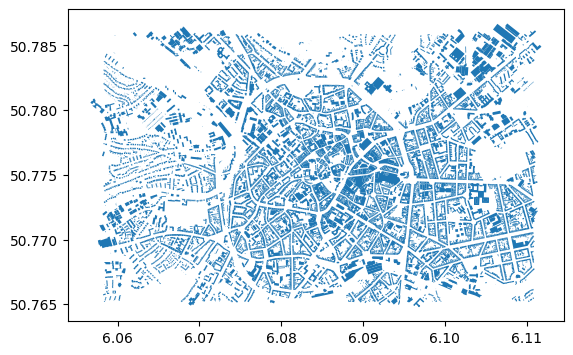

In [3]:
data.plot()